In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

First lets take our Customer Personality Analysis dataset.

In [8]:
data = pd.read_csv("marketing_campaign_new.csv", sep="\t")
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data Description

In [9]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
# checking null values in dataset
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
# we can clearly see in income column there are 24 null values.
# Let's replacing null values with average income.
avg = data['Income'].mean()

52247.25135379061

In [15]:
data['Income'].fillna(avg,inplace=True)
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


### EDA - Exploratory Data Analysis

In [19]:
# A copy of the data set is made for the EDA process and for future transformations
data1 = data.copy()
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


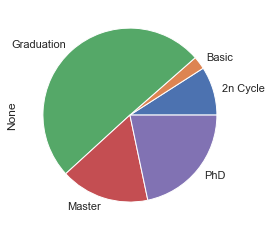

In [20]:
# Let's visualize some data.
## Education: Customer's education level
data1.groupby('Education').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(4,4)})

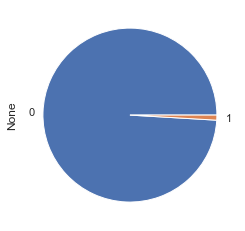

In [22]:
## Complain: 1 if customer complained in the last 2 years, 0 otherwise
data1.groupby('Complain').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(4,4)})

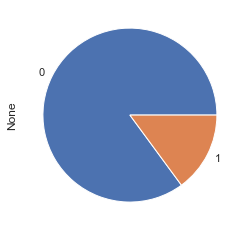

In [23]:
## Response:1 if customer accepted the offer in the last campaign, 0 otherwise
data1.groupby('Response').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(4,4)})

In [24]:
# Let's have a look in datatyps in the dataset.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [27]:
# Categorical variables (object) must be transformed to numeric to be able to work with them.
# Now lets change datatype in the dataset.
## 1. Dt_Customer ==> to pandas datetime

data1['Dt_Customer'] = pd.to_datetime(data1.Dt_Customer)
data1['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [38]:
## 2. Education(object) ==> (int)
lb_encoder = LabelEncoder()
data1['Education'] = lb_encoder.fit_transform(data1['Education'])

In [40]:
## 3. Marital_Status(object) ==> (int)
data1['Marital_Status'] = lb_encoder.fit_transform(data1['Marital_Status'])

In [43]:
# year of birth is so important but Age of person may be important, so extracting age from Yob.
# considering current year as 2014 because latest date in dataset is 2014 this may be on which the study appears to have been carried out or the date.
data1['Age'] = 2014 - data1['Year_Birth']

Now for simplicity, creating a age ranges.

In [46]:
# it will create a ranges in multiple of five.

data1['age_range'] = (data1['Age']//5)*5
data1['age_range'].head(5)

0    55
1    60
2    45
3    30
4    30
Name: age_range, dtype: int64

In [ ]:
drop Age Year_Birth column

In [62]:
data1.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year
0,5524,1957,2,4,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,57,55,2012
1,2174,1954,2,4,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,60,60,2014
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,49,45,2013
3,6182,1984,2,5,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,30,30,2014
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,33,30,2014


Now let's see this income with age range, this will be a meningfull data.

In the below table it shows how age affect income, and at what age income is max/min. From such simple comparison table can fetch many hidden information.  

In [49]:
round(data1.pivot_table(['Income'],['age_range']),3)

,Income
age_range,
15,46658.000
20,53683.167
25,43860.034
30,47580.728
35,50201.859
40,49768.206
45,52238.077
50,55510.578
55,56668.818


Lets comapare income with age range and Education

In [56]:
round(data1.pivot_table(['Income'],['age_range'],['Education'],fill_value=0),2)

Income                                        
Education         0         1         2         3         4
age_range                                                  
15         57124.67  14421.00  46937.00      0.00      0.00
20         48948.80  18012.43  55769.06  81595.40  69926.00
25         32391.86  17403.20  46710.22  45802.89  53447.83
30         48668.90  25161.50  46214.14  41956.15  58309.03
35         39128.96  20756.83  53765.49  48525.91  55874.16
40         43854.63  18949.17  49231.27  52897.61  52604.82
45         59966.14  22796.75  52631.61  49702.85  53684.20
50         60021.89  23384.75  55756.37  58262.46  54184.60
55         58727.09  15056.00  56743.90  56986.33  56108.42
60         58877.89  20040.50  56751.94  53622.57  58446.58
65         77951.50  28389.00  62447.84  64005.14  64611.38
70             0.00      0.00  67273.33  64021.65  64221.50
110        36640.00      0.00      0.00      0.00      0.00
115            0.00      0.00      0.00      0.00  83532.00
120        60182.00      0.00      0.00      0.00      0.00

In the above table we can clearly observe that customer with masters(value=3) degree in early edge is showing 81595.40, so from this we can suggest high quality product to such customers, it will also depend on multiple factors such amound spend and etc.

In dataset, customer joining data i.e Dt_Customer is not important but year may matters, extracting year from Dt_Customer column.

In [58]:
data1['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [61]:
data1['Year'] = data1['Dt_Customer'].dt.year

In [ ]:
drop DT_customer

In [63]:
data1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year
0,5524,1957,2,4,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,57,55,2012
1,2174,1954,2,4,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,60,60,2014
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,49,45,2013
3,6182,1984,2,5,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,30,30,2014
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,33,30,2014


In [60]:
data1.groupby('Dt_Customer').size()

Dt_Customer
2012-01-08     4
2012-01-09     1
2012-01-10     5
2012-01-11     2
2012-01-12     4
              ..
2014-12-02     3
2014-12-03     5
2014-12-04     2
2014-12-05    11
2014-12-06     1
Length: 663, dtype: int64

In [65]:
# Our dataset is in this year range
data1.groupby('Year').size()

Year
2012     494
2013    1189
2014     557
dtype: int64

Now, let's all products i.e what is the total spend of each customer. We do have each customer's record of spending money on each product.

In [66]:
# just doing sum of all products and creating a new column in data1.
data1['Total_spend'] = data1['MntWines']+data1['MntFruits']+data1['MntMeatProducts']+data1['MntFishProducts']+data1['MntSweetProducts']+data1['MntGoldProds']

In [68]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

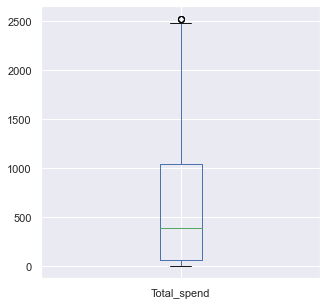

In [72]:
data1['Total_spend'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

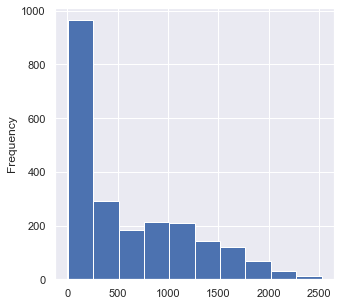

In [74]:
data1['Total_spend'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

The graph shows customers are spending much under 500.

Let's combine Kidhome and Teenhome columns of our datasets, because it will not affect much.

In [76]:
# just doing sum and creating a new column in data1.
data1['Total_Sons'] = data1['Kidhome']+data1['Teenhome']

In [77]:
data1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'age_range', 'Year', 'Total_spend', 'Total_Sons'],
      dtype='object')

In [80]:
data1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons
0,5524,1957,2,4,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,57,55,2012,1617,0
1,2174,1954,2,4,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,60,60,2014,27,2
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,49,45,2013,776,0
3,6182,1984,2,5,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,30,30,2014,53,1
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,33,30,2014,422,1


Now, Lets have a look on correlations.

In [78]:
data1.corr()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons
ID,1.000000,0.000028,-0.003839,0.019580,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,...,-0.015061,0.033883,NaN,NaN,-0.021968,-0.000028,0.004823,-0.006414,-0.018054,-0.000146
Year_Birth,0.000028,1.000000,-0.171390,-0.060580,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,...,-0.006539,-0.030128,NaN,NaN,0.021325,-1.000000,-0.992990,-0.028188,-0.111306,-0.090199
Education,-0.003839,-0.171390,1.000000,0.007090,0.119974,-0.045564,0.118485,-0.011728,0.197576,-0.080412,...,0.021369,-0.050540,NaN,NaN,0.090819,0.171390,0.174351,0.045356,0.092054,0.053189
Marital_Status,0.019580,-0.060580,0.007090,1.000000,0.021267,-0.022553,-0.003596,0.014159,0.008205,0.000593,...,0.018417,-0.005718,NaN,NaN,-0.011403,0.060580,0.059584,-0.018176,0.020713,-0.018756
Income,0.013036,-0.160942,0.119974,0.021267,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,...,0.087538,-0.027223,NaN,NaN,0.132756,0.160942,0.158782,0.022366,0.664706,-0.290712
Kidhome,0.002406,0.230176,-0.045564,-0.022553,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,...,-0.081716,0.040207,NaN,NaN,-0.080008,-0.230176,-0.228282,0.053339,-0.556669,0.689971
Teenhome,-0.002580,-0.352111,0.118485,-0.003596,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,...,-0.015605,0.003138,NaN,NaN,-0.154446,0.352111,0.346441,-0.008260,-0.138384,0.698433
Recency,-0.046524,-0.019871,-0.011728,0.014159,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,...,-0.001781,0.013231,NaN,NaN,-0.198437,0.019871,0.023418,-0.026084,0.020433,0.018053
MntWines,-0.022878,-0.157773,0.197576,0.008205,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,...,0.205907,-0.039007,NaN,NaN,0.247254,0.157773,0.157840,-0.154188,0.891839,-0.351909
MntFruits,0.004600,-0.017917,-0.080412,0.000593,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,...,-0.009773,-0.005166,NaN,NaN,0.125289,0.017917,0.017495,-0.055150,0.614229,-0.394853


This table is not much understandable so let's visualize it on heat-map.

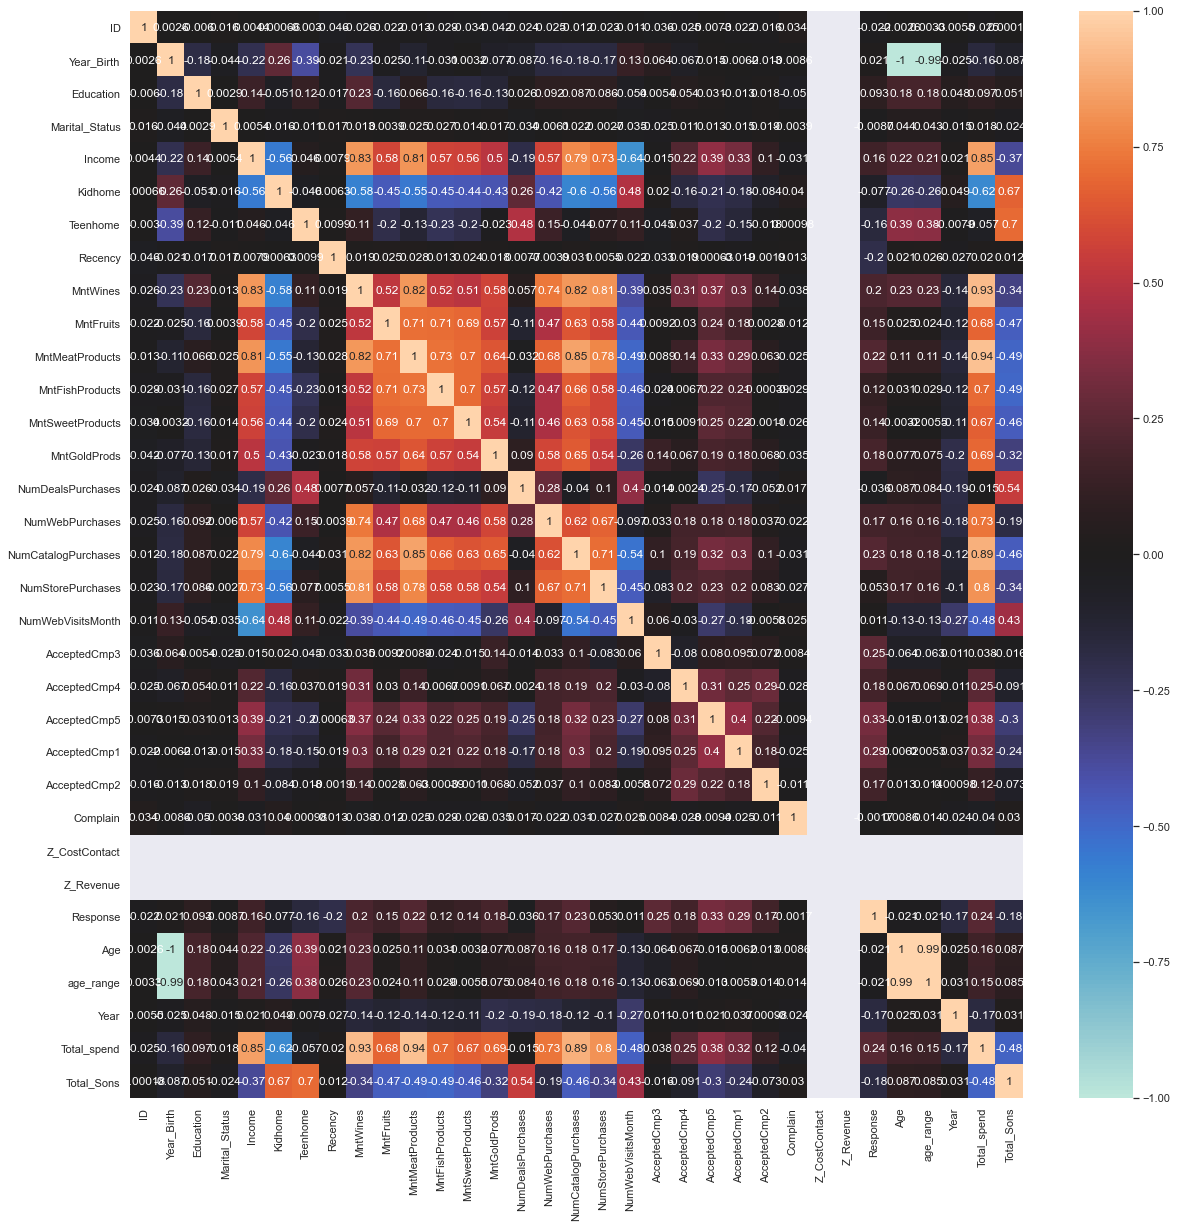

In [85]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data1.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

Here i had not done one thing i.e after combining or doing some EDA on columns in our dataset i did not drop that column because in future I might need it for comparison, so now instade of droping columns from data1 I am picking up columns which are important.

In [82]:
data2 = data1.iloc[:,[2,3,4,8,33,32,29,25,23,28,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

In [83]:
data2.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Total_Sons',
       'Total_spend', 'Age', 'Complain', 'AcceptedCmp1', 'Response', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4'],
      dtype='object')

In [86]:
data2.head()

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
0,2,4,58138.0,58,0,1617,57,0,0,1,...,172,88,88,3,8,10,4,7,0,0
1,2,4,46344.0,38,2,27,60,0,0,0,...,2,1,6,2,1,1,2,5,0,0
2,2,5,71613.0,26,0,776,49,0,0,0,...,111,21,42,1,8,2,10,4,0,0
3,2,5,26646.0,26,1,53,30,0,0,0,...,10,3,5,2,2,0,4,6,0,0
4,4,3,58293.0,94,1,422,33,0,0,0,...,46,27,15,5,5,3,6,5,0,0


Lets visualize correlations by ploting heatmap.

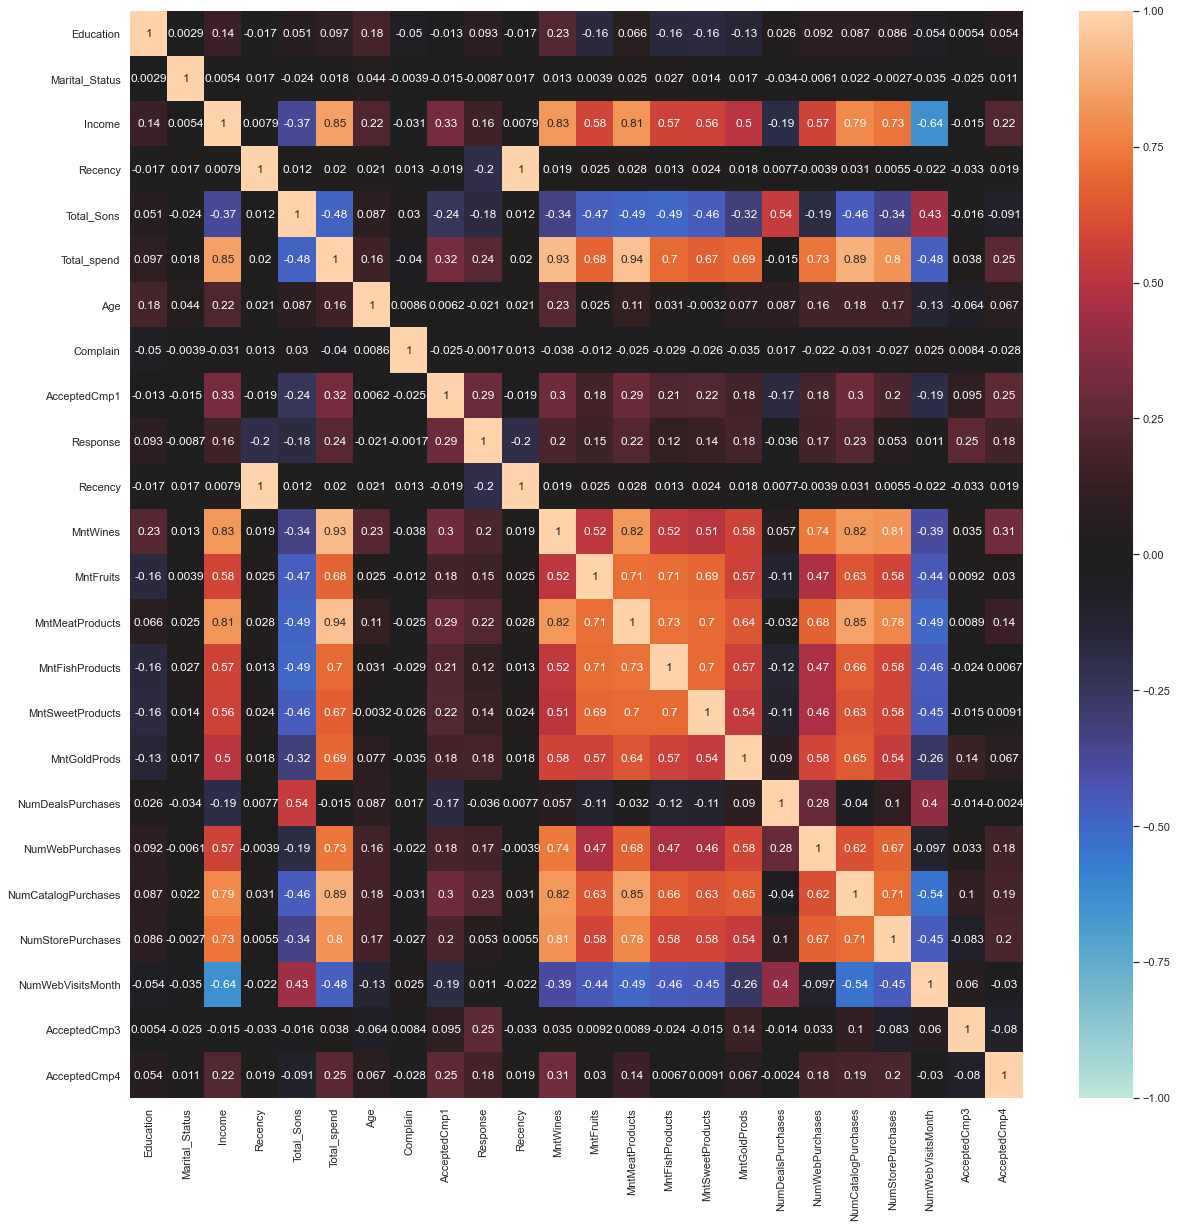

In [87]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data2.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

### PCA

In [91]:
data2.describe()

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.393750,3.729911,52247.251354,49.109375,0.950446,605.798214,45.194196,0.009375,0.064286,0.149107,...,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554
std,1.124797,1.076277,25037.797168,28.962453,0.751803,602.249288,11.984069,0.096391,0.245316,0.356274,...,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728
min,0.000000,0.000000,1730.000000,0.000000,0.000000,5.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,35538.750000,24.000000,0.000000,68.750000,37.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,2.000000,4.000000,51741.500000,49.000000,1.000000,396.000000,44.000000,0.000000,0.000000,0.000000,...,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,3.000000,5.000000,68289.750000,74.000000,1.000000,1045.500000,55.000000,0.000000,0.000000,0.000000,...,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,4.000000,7.000000,666666.000000,99.000000,3.000000,2525.000000,121.000000,1.000000,1.000000,1.000000,...,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


Now for appling PCA we need to standardized data, so lets standardiz our dataset first.

In [90]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)

In [92]:
data2.describe()

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.393750,3.729911,52247.251354,49.109375,0.950446,605.798214,45.194196,0.009375,0.064286,0.149107,...,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554
std,1.124797,1.076277,25037.797168,28.962453,0.751803,602.249288,11.984069,0.096391,0.245316,0.356274,...,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728
min,0.000000,0.000000,1730.000000,0.000000,0.000000,5.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,35538.750000,24.000000,0.000000,68.750000,37.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,2.000000,4.000000,51741.500000,49.000000,1.000000,396.000000,44.000000,0.000000,0.000000,0.000000,...,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,3.000000,5.000000,68289.750000,74.000000,1.000000,1045.500000,55.000000,0.000000,0.000000,0.000000,...,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,4.000000,7.000000,666666.000000,99.000000,3.000000,2525.000000,121.000000,1.000000,1.000000,1.000000,...,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [94]:
data2_df = pd.DataFrame(data = scaled_data,columns=data2.columns)

In [95]:
data2_df.head()

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
0,-0.350141,0.251004,0.235327,0.307039,-1.264505,1.679417,0.985345,-0.097282,-0.262111,2.388846,...,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383
1,-0.350141,0.251004,-0.235826,-0.383664,1.396361,-0.961275,1.235733,-0.097282,-0.262111,-0.418612,...,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383
2,-0.350141,1.180340,0.773633,-0.798086,-1.264505,0.282673,0.317643,-0.097282,-0.262111,-0.418612,...,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383
3,-0.350141,1.180340,-1.022732,-0.798086,0.065928,-0.918094,-1.268149,-0.097282,-0.262111,-0.418612,...,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383
4,1.428354,-0.678332,0.241519,1.550305,0.065928,-0.305254,-1.017761,-0.097282,-0.262111,-0.418612,...,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383


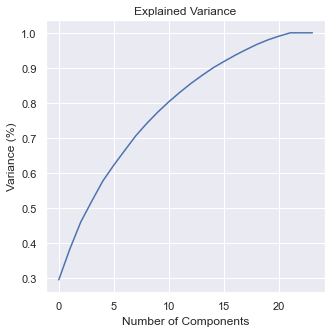

In [96]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data2_df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [110]:
data2_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Total_Sons',
       'Total_spend', 'Age', 'Complain', 'AcceptedCmp1', 'Response', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4'],
      dtype='object')

In [99]:
pca = PCA(n_components=21)
new_data = pca.fit_transform(data2_df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11','principal component 12','principal component 13','principal component 14','principal component 15','principal component 16','principal component 17','principal component 18','principal component 19','principal component 20','principal component 21'])

In [100]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21
0,4.328424,0.120414,0.191108,-0.201633,1.564729,0.665953,0.358009,-0.707018,0.243500,0.712902,...,1.960974,-0.000578,-0.915329,-0.231946,0.958701,0.663840,0.712549,0.224482,-0.249583,-0.938724
1,-2.587033,0.264346,-0.237398,-0.268995,-1.100545,0.454999,0.393181,-0.230795,1.380773,0.583132,...,0.257320,-0.070836,0.182997,0.063023,0.190565,0.330475,-0.059290,-0.291120,-0.181282,-0.130635
2,1.740170,0.721243,-0.618917,-1.188755,-0.842543,-0.216472,0.341931,-0.989346,-0.291655,-1.295859,...,-0.620391,-0.293209,-0.533257,0.552889,-0.797965,0.212978,0.987411,0.809258,0.026938,0.035104
3,-2.486668,0.900524,-1.166016,-0.158782,-0.138304,-0.603503,0.157602,-1.082453,-0.911574,0.089695,...,-0.368220,0.094587,-0.061605,-0.112217,-0.177349,-0.208702,-0.019686,0.007048,-0.192156,0.054890
4,-0.257877,-2.080690,0.904061,-0.096742,0.254379,0.218875,-1.004394,0.771384,-1.253819,1.050524,...,-0.365172,-0.281943,0.390003,-0.150801,-0.091019,-0.347508,0.067660,1.139920,0.097265,-0.151627


Here, we see that earlier we had 24 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 21. This is the advantage of PCA. It drastically reduces the number of features, thereby considerably reducing the training time for the model.

### K-means Clustering

In [101]:
from sklearn.cluster import KMeans

In [102]:
wcss=[]
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,precompute_distances=True,random_state=33)
    kmeans.fit(principal_Df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


53264.547992710235
40745.63860481476
37599.29159415617
35612.201543632335

C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "



33860.50078183667
32445.193415196212

C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "



31142.83775278077


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


29037.975567430516
28508.255168704065


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


27602.763608420308
26916.224181712318


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


26338.252218669975
25821.247323914427

C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "



25358.226568471513

C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


24866.587493386167


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


24462.805734725098


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


24096.333467991033


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


23752.223526525057


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


23398.62667065967


C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


23054.420983436215


In [103]:
wcss

[53264.547992710235,
 40745.63860481476,
 37599.29159415617,
 35612.201543632335,
 33860.50078183667,
 32445.193415196212,
 31142.83775278077,
 29037.975567430516,
 28508.255168704065,
 27602.763608420308,
 26916.224181712318,
 26338.252218669975,
 25821.247323914427,
 25358.226568471513,
 24866.587493386167,
 24462.805734725098,
 24096.333467991033,
 23752.223526525057,
 23398.62667065967,
 23054.420983436215]

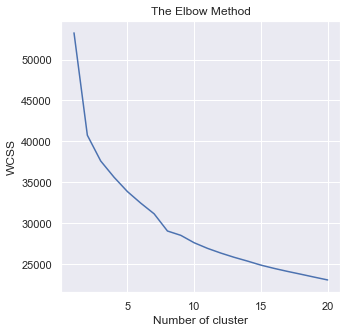

In [105]:
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In the Elbow graph we can see little dispersion at Number of cluster = 6

In [106]:
cluster = KMeans(n_clusters=6,init='k-means++',precompute_distances=True,random_state=33) # created an object
cluster_pred = cluster.fit_predict(principal_Df)

C:\Users\Ashu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


Now, append this this prediction array in dataset 

In [107]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21
0,4.328424,0.120414,0.191108,-0.201633,1.564729,0.665953,0.358009,-0.707018,0.243500,0.712902,...,1.960974,-0.000578,-0.915329,-0.231946,0.958701,0.663840,0.712549,0.224482,-0.249583,-0.938724
1,-2.587033,0.264346,-0.237398,-0.268995,-1.100545,0.454999,0.393181,-0.230795,1.380773,0.583132,...,0.257320,-0.070836,0.182997,0.063023,0.190565,0.330475,-0.059290,-0.291120,-0.181282,-0.130635
2,1.740170,0.721243,-0.618917,-1.188755,-0.842543,-0.216472,0.341931,-0.989346,-0.291655,-1.295859,...,-0.620391,-0.293209,-0.533257,0.552889,-0.797965,0.212978,0.987411,0.809258,0.026938,0.035104
3,-2.486668,0.900524,-1.166016,-0.158782,-0.138304,-0.603503,0.157602,-1.082453,-0.911574,0.089695,...,-0.368220,0.094587,-0.061605,-0.112217,-0.177349,-0.208702,-0.019686,0.007048,-0.192156,0.054890
4,-0.257877,-2.080690,0.904061,-0.096742,0.254379,0.218875,-1.004394,0.771384,-1.253819,1.050524,...,-0.365172,-0.281943,0.390003,-0.150801,-0.091019,-0.347508,0.067660,1.139920,0.097265,-0.151627


In [109]:
principal_Df['cluster'] = cluster_pred


new_dataset = principal_Df
new_dataset.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,cluster
0,4.328424,0.120414,0.191108,-0.201633,1.564729,0.665953,0.358009,-0.707018,0.243500,0.712902,...,-0.000578,-0.915329,-0.231946,0.958701,0.663840,0.712549,0.224482,-0.249583,-0.938724,1
1,-2.587033,0.264346,-0.237398,-0.268995,-1.100545,0.454999,0.393181,-0.230795,1.380773,0.583132,...,-0.070836,0.182997,0.063023,0.190565,0.330475,-0.059290,-0.291120,-0.181282,-0.130635,5
2,1.740170,0.721243,-0.618917,-1.188755,-0.842543,-0.216472,0.341931,-0.989346,-0.291655,-1.295859,...,-0.293209,-0.533257,0.552889,-0.797965,0.212978,0.987411,0.809258,0.026938,0.035104,2
3,-2.486668,0.900524,-1.166016,-0.158782,-0.138304,-0.603503,0.157602,-1.082453,-0.911574,0.089695,...,0.094587,-0.061605,-0.112217,-0.177349,-0.208702,-0.019686,0.007048,-0.192156,0.054890,5
4,-0.257877,-2.080690,0.904061,-0.096742,0.254379,0.218875,-1.004394,0.771384,-1.253819,1.050524,...,-0.281943,0.390003,-0.150801,-0.091019,-0.347508,0.067660,1.139920,0.097265,-0.151627,2


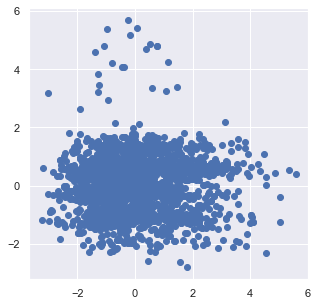

In [115]:
plt.scatter(new_dataset['principal component 3'],new_dataset['principal component 8'])